In [1]:
import requests
from config import weather_api_key
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd

In [2]:
# Create an empty list to hold the weather data
city_data = []
# Print th beginning of the logging
print("Beginning Data Retrieval  ")
print("--------------------------")

Beginning Data Retrieval  
--------------------------


In [3]:
# Create counters
record_count = 1
set_count = 1

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add coordinates from tuple to list
coordinates = list(lat_lngs)

# Create a list for holding cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If city is not in list, add it to list
    if city not in cities:
        cities.append(city)
# Print count of cities to confirm sufficient count
len(cities)

614

In [7]:
# Loop through all the cities in the list using the enumerate method
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Increase the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

ocessing Record 11 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 4 | kahului
Processing Record 13 of Set 4 | benjamin aceval
Processing Record 14 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 4 | kimbe
Processing Record 16 of Set 4 | nyurba
Processing Record 17 of Set 4 | kungurtug
Processing Record 18 of Set 4 | vao
Processing Record 19 of Set 4 | lhokseumawe
Processing Record 20 of Set 4 | aswan
Processing Record 21 of Set 4 | comodoro rivadavia
Processing Record 22 of Set 4 | norden
Processing Record 23 of Set 4 | prince rupert
Processing Record 24 of Set 4 | christchurch
Processing Record 25 of Set 4 | dikson
Processing Record 26 of Set 4 | antalaha
Processing Record 27 of Set 4 | umm durman
City not found. Skipping...
Processing Record 28 of Set 4 | lobez
Processing Record 29 of Set 4 | honavar
Processing Record 30 of Set 4 | bud
Processing Record 31 of Set 4 | sonderso
Processing Record 32 of Set 4 | sechura
Processi

In [8]:
len(city_data)

563

In [9]:
# Convert city data array into DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dawei,14.08,98.20,74.55,89,44,3.58,MM,2020-10-21 17:47:42
1,Kapaa,22.08,-159.32,71.60,88,20,5.82,US,2020-10-21 17:47:42
2,Cape Town,-33.93,18.42,61.00,77,0,17.22,ZA,2020-10-21 17:43:22
3,Bredasdorp,-34.53,20.04,60.80,77,0,5.82,ZA,2020-10-21 17:47:42
4,Saint-Francois,46.42,3.91,68.00,52,73,14.99,FR,2020-10-21 17:47:42
5,Mattawa,46.74,-119.90,51.80,57,1,10.29,US,2020-10-21 17:47:43
6,Chuy,-33.70,-53.46,62.42,65,55,15.05,UY,2020-10-21 17:47:43
7,Tasiilaq,65.61,-37.64,30.20,86,75,4.54,GL,2020-10-21 17:47:43
8,Saskylakh,71.92,114.08,8.24,94,91,4.07,RU,2020-10-21 17:47:43
9,Pisco,-13.70,-76.22,69.80,64,0,9.17,PE,2020-10-21 17:47:33


In [10]:
# Rearrange columns into a more logical order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dawei,MM,2020-10-21 17:47:42,14.08,98.20,74.55,89,44,3.58
1,Kapaa,US,2020-10-21 17:47:42,22.08,-159.32,71.60,88,20,5.82
2,Cape Town,ZA,2020-10-21 17:43:22,-33.93,18.42,61.00,77,0,17.22
3,Bredasdorp,ZA,2020-10-21 17:47:42,-34.53,20.04,60.80,77,0,5.82
4,Saint-Francois,FR,2020-10-21 17:47:42,46.42,3.91,68.00,52,73,14.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [14]:
import time
today = time.strftime('%x')
today

'10/21/20'

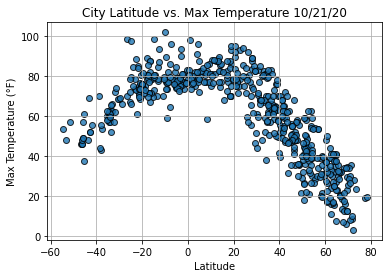

In [15]:
import matplotlib.pyplot as plt 
# Create the scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig1.png')
plt.show()

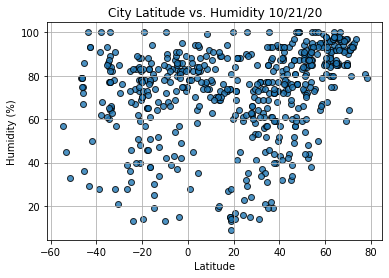

In [16]:
# Create the scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

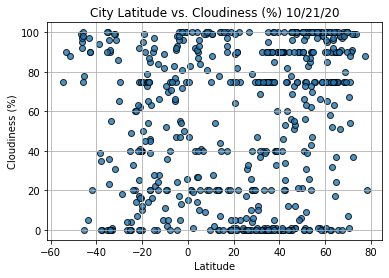

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

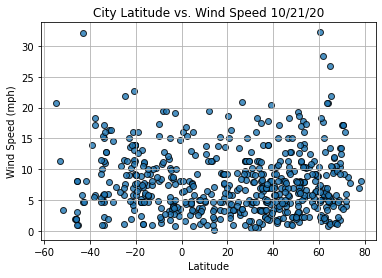

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress 
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print('R value:' + str(r_value) + '  ---  p value:' + str(p_value))

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

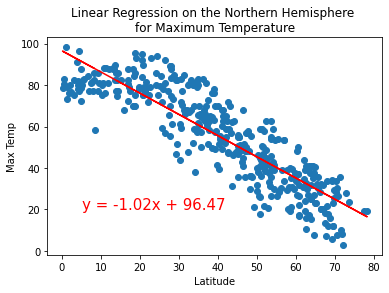

R value:-0.8784908776682907  ---  p value: 7.497509149759104e-127


In [42]:
# Linear regression on the Northern Hemisphere for temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(5,20))

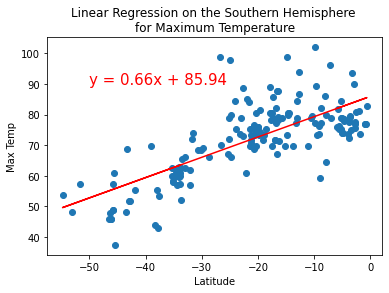

R value:0.7375559898260535  ---  p value:8.493865890328698e-31


In [44]:
# Linear regression on the Southern Hemisphere for temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

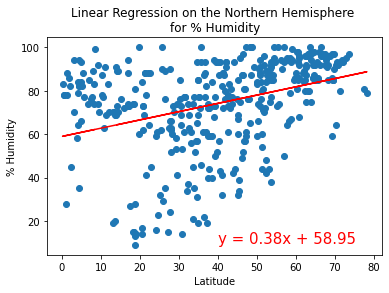

R value:0.3567849072173959  ---  p value:3.5127522698967115e-13


In [47]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

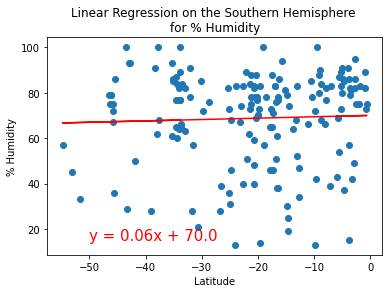

R value:0.03908978803846043  ---  p value:0.6106721870139917


In [46]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

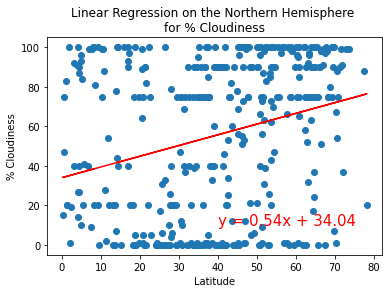

R value:0.27457345101764036  ---  p value:3.4215652895725035e-08


In [45]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

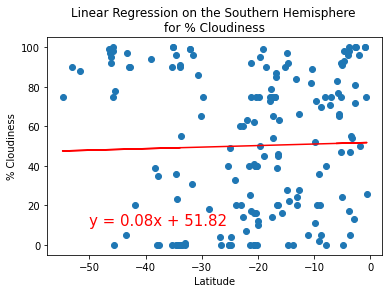

R value:0.028764683890357624  ---  p value:0.7079787991294176


In [51]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,10))

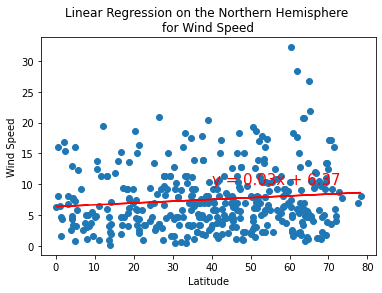

R value:0.11345801160028965  ---  p value:0.02486116934214947


In [53]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,10))

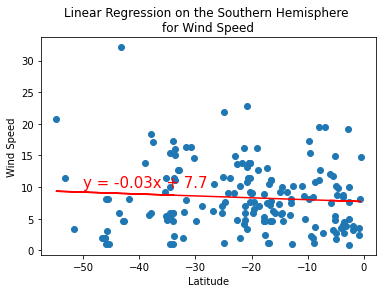

R value:-0.07562603698401041  ---  p value:0.32412979318412694


In [54]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,10))